# Food.com - Recipes and Reviews
### About Dataset
The recipes dataset contains 522,517 recipes from 312 different categories. This dataset provides information about each recipe like cooking times, servings, ingredients, nutrition, instructions, and more.
The reviews dataset contains 1,401,982 reviews from 271,907 different users. This dataset provides information about the author, rating, review text, and more.

In [19]:
import kagglehub
import pandas as pd

# Optionally, set your Kaggle config dir if needed
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# os.environ["KAGGLE_CONFIG_DIR"] = os.path.expanduser("~/.kaggle")

# # Download the dataset
# dataset_path = kagglehub.dataset_download("irkaal/foodcom-recipes-and-reviews")

# # Load a CSV from the dataset
# recipes = pd.read_csv(f"{dataset_path}/recipes.csv")
# reviews = pd.read_csv(f"{dataset_path}/reviews.csv")

recipes.to_csv("input_data/reviews.csv")
reviews.to_csv("input_data/recipes.csv")

In [23]:
# We have ~500K recipes and 1.4M reviews
print("Total number of rows and columns in Recipes file:", recipes.shape)
print("Total number of rows and columns in Reviews file", reviews.shape)

Total number of rows and columns in Recipes file: (522517, 28)
Total number of rows and columns in Reviews file (1401982, 8)


In [24]:
recipes.loc[0,]

RecipeId                                                                     38
Name                                          Low-Fat Berry Blue Frozen Dessert
AuthorId                                                                   1533
AuthorName                                                               Dancer
CookTime                                                                  PT24H
PrepTime                                                                  PT45M
TotalTime                                                              PT24H45M
DatePublished                                              1999-08-09T21:46:00Z
Description                   Make and share this Low-Fat Berry Blue Frozen ...
Images                        c("https://img.sndimg.com/food/image/upload/w_...
RecipeCategory                                                  Frozen Desserts
Keywords                      c("Dessert", "Low Protein", "Low Cholesterol",...
RecipeIngredientQuantities              

In [25]:
# For example all the reviews for the food above
reviews.loc[reviews['RecipeId'] == 38, 'Review']

532978     Yummy, yummy, yummy! I am a big fan of fruit a...
716354     very good!! the directions were alittle weird ...
1261835    This does taste great! I think the recipe need...
1263786    Tasty and refreshing! I love the creamy flavor...
Name: Review, dtype: object

In [26]:
reviews.loc[0,]

ReviewId                                                    2
RecipeId                                                  992
AuthorId                                                 2008
AuthorName                                          gayg msft
Rating                                                      5
Review           better than any you can get at a restaurant!
DateSubmitted                            2000-01-25T21:44:00Z
DateModified                             2000-01-25T21:44:00Z
Name: 0, dtype: object

### Lets see how many nan values in each columns we have?


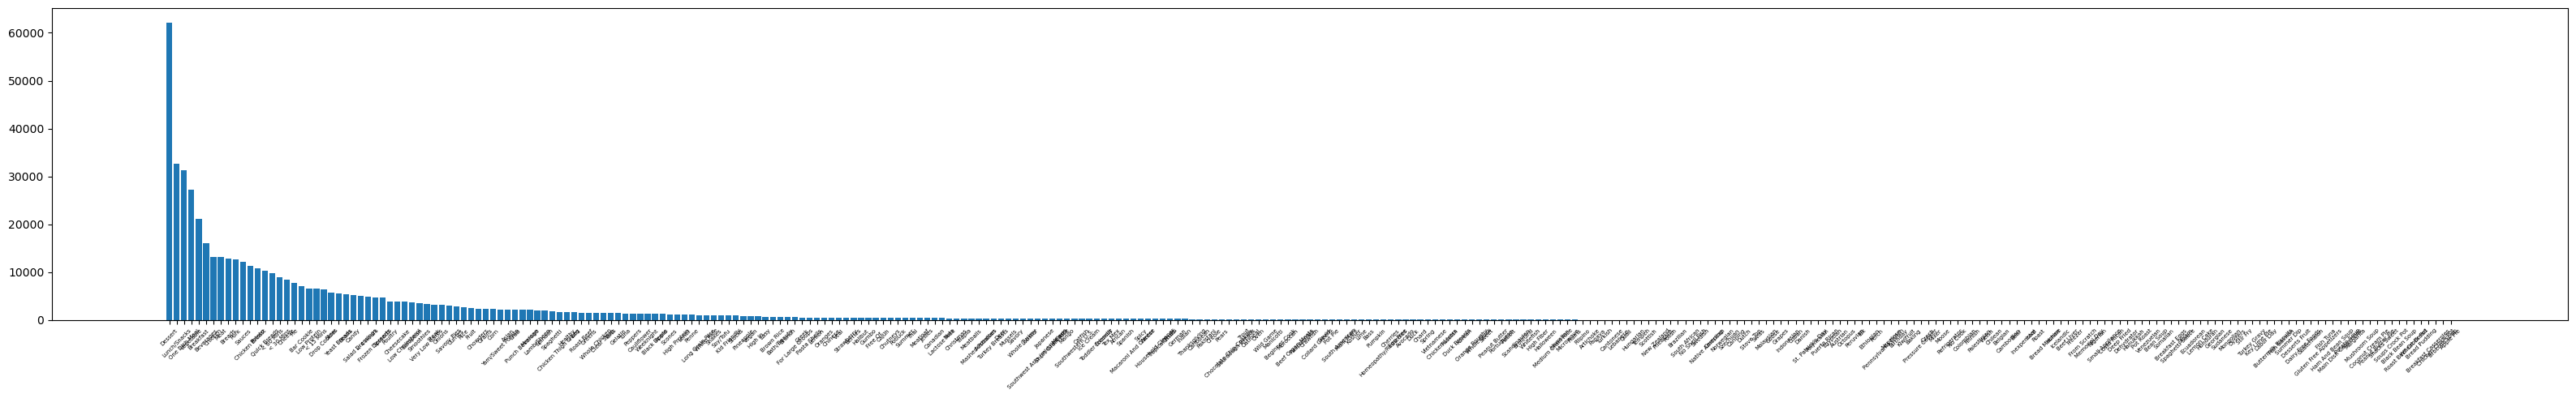

RecipeCategory
Dessert                 62072
Lunch/Snacks            32586
One Dish Meal           31345
Vegetable               27231
Breakfast               21101
                        ...  
Bread Pudding               1
Breakfast Casseroles        1
Chicken Crock Pot           1
Broccoli Soup               1
Apple Pie                   1
Name: count, Length: 311, dtype: int64


In [28]:
# RecipeCategory seems like a good information that we dont have for 750 recipes
plt.figure(figsize=(40, 5))
counts = recipes.value_counts('RecipeCategory')
plt.bar(counts.index, counts.values)
plt.xticks(rotation=45, size =5)  # if labels are long
plt.show()

print(counts)

In [30]:
# Lets see some examples of the missing values
for i in [10, 20, 30]:
    print(recipes.loc[i, 'Keywords'])
    print(recipes.loc[i,'RecipeIngredientQuantities'])
    print(recipes.loc[i,'AggregatedRating'])
    print(recipes.loc[i,'ReviewCount'])
    print(recipes.loc[i,'RecipeServings'])
    print(recipes.loc[i, 'RecipeYield'])

c("Dessert", "Weeknight", "Oven", "< 4 Hours")
c("1/2", "2 1/4", "3", "1", "1 1/2", "1/3", "1 1/2", "2", "1", "1/3", "1", "1 1/2", "1", "1/2", "1", "1/4", "1", "1 1/2", "2", "1")
2.0
2.0
8.0
1 pie
c("Vegetable", "Meat", "Low Cholesterol", "Healthy", "Free Of...", "Weeknight", "< 4 Hours")
c("1 1/2", "1", "1", "1/2", "1/2", "1", "1/2", "3", "5 1/2", "1", "2", "1")
4.5
7.0
6.0
nan
c("Mexican", "Free Of...", "Weeknight", "Easy")
c("1 1/2", "1", "1")
nan
nan
nan
1 batch


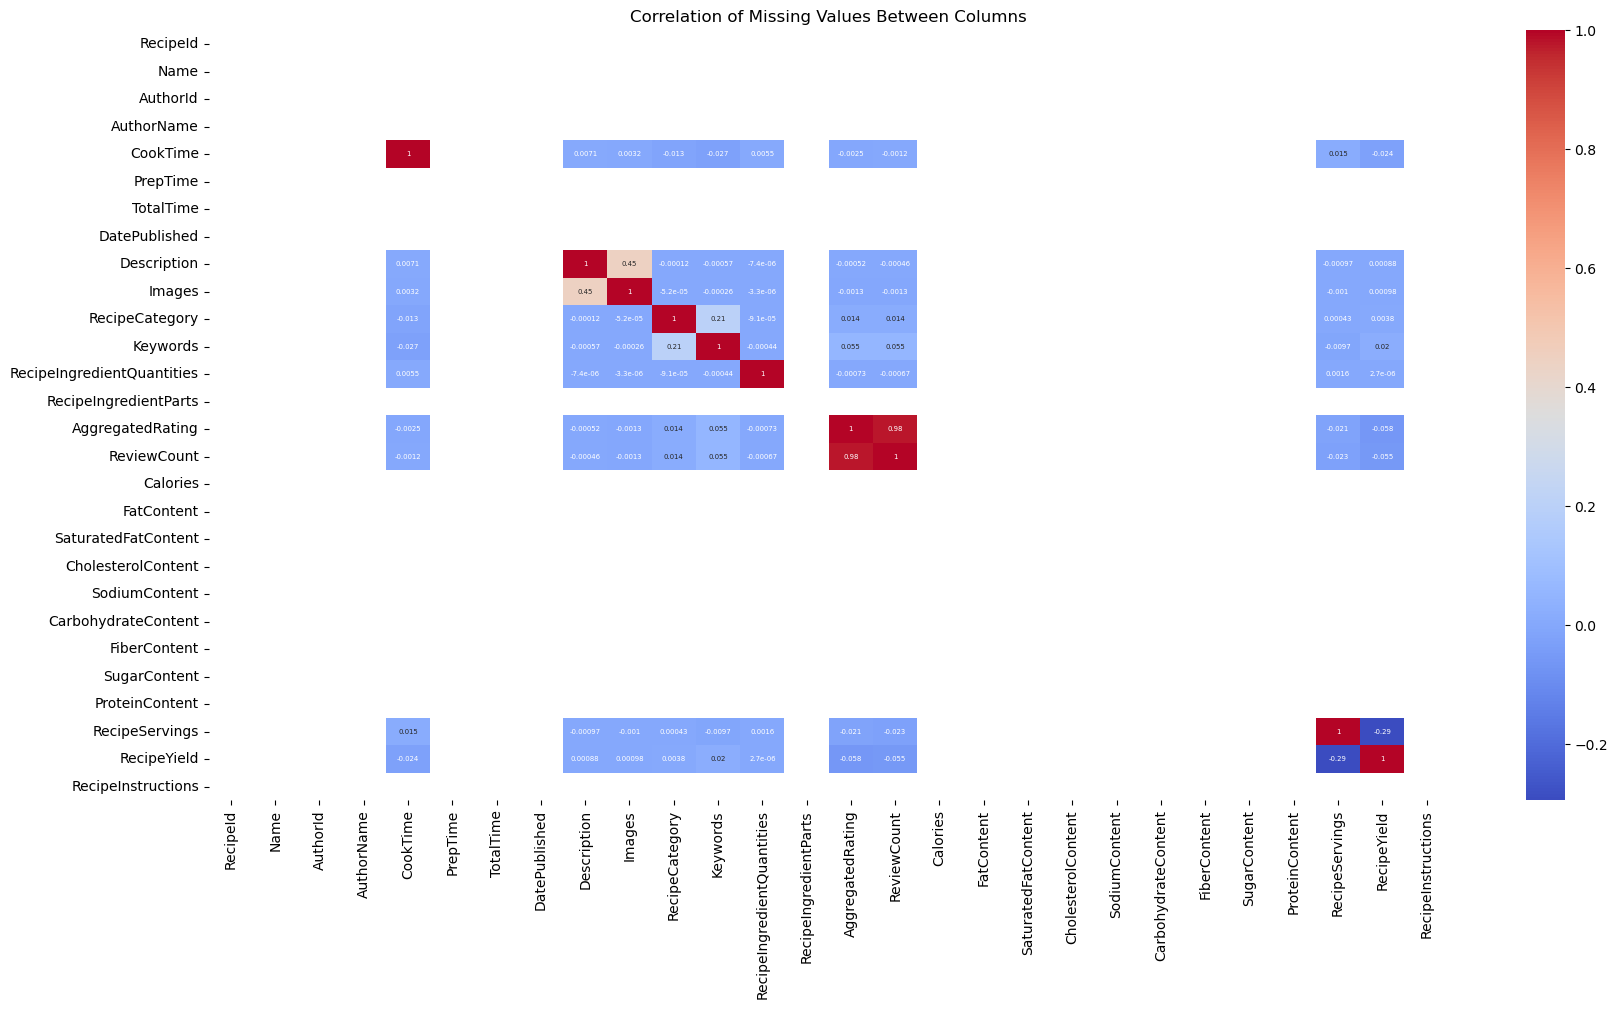

In [31]:
# Boolean mask of missing values
missing = recipes.isna()

# Compute correlation between columns for missingness
missing_corr = missing.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(missing_corr, annot=True, cmap="coolwarm", annot_kws={"size": 5})
plt.title("Correlation of Missing Values Between Columns")
plt.show()

In [32]:
recipes.isna().sum()

RecipeId                           0
Name                               0
AuthorId                           0
AuthorName                         0
CookTime                       82545
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                        5
Images                             1
RecipeCategory                   751
Keywords                       17237
RecipeIngredientQuantities         3
RecipeIngredientParts              0
AggregatedRating              253223
ReviewCount                   247489
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                182911
RecipeYield                   348071
R

In [33]:
drop_columns = ["CookTime", "Keywords", "AggregatedRating", "ReviewCount", "RecipeServings", "RecipeYield", "RecipeIngredientQuantities", "Images", "Description"]
recipes = recipes.drop(columns=drop_columns, axis=1)

In [34]:
recipes = recipes.dropna(subset=['RecipeCategory'])

In [35]:
recipes.shape

(521766, 19)

In [37]:
recipes[['PrepTime', 'TotalTime']].head()

,PrepTime,TotalTime
0,PT45M,PT24H45M
1,PT4H,PT4H25M
2,PT30M,PT35M
3,PT24H,PT24H20M
4,PT20M,PT50M


In [42]:
# Convert the times to float values and remove all the rows with nan values

# 1. Convert the original columns to Timedelta, setting invalid entries to NaT
# The 'errors='coerce'' handles invalid ISO 8601 strings (like 'PT817H30M') by turning them into NaT.
recipes['PrepTime_td'] = pd.to_timedelta(recipes['PrepTime'], errors='coerce')
recipes['TotalTime_td'] = pd.to_timedelta(recipes['TotalTime'], errors='coerce')

# 2. Filter the DataFrame to KEEP only the rows where BOTH conversions succeeded
# .notna() checks where the Timedelta value is NOT NaT (meaning it was a valid time).
recipes_clean = recipes[
    recipes['PrepTime_td'].notna() & recipes['TotalTime_td'].notna()
].copy()

# 3. Convert the VALID Timedelta columns into total minutes
# .dt.total_seconds() gets the total time in seconds, which is then divided by 60.
recipes_clean['PrepTime_minutes'] = recipes_clean['PrepTime_td'].dt.total_seconds() / 60
recipes_clean['TotalTime_minutes'] = recipes_clean['TotalTime_td'].dt.total_seconds() / 60

# 4. Optional Cleanup: Drop the temporary Timedelta columns and original string columns
#    You may adjust this step based on which columns you want to keep for analysis.
recipes_clean = recipes_clean.drop(columns=['PrepTime_td', 'TotalTime_td', 'PrepTime', 'TotalTime'])


print(f"Original number of recipes: {len(recipes)}")
print(f"Cleaned number of recipes: {len(recipes_clean)}")
print("\nCleaned DataFrame 'recipes_clean' with Times in Minutes:")
print(recipes_clean.head())

Original number of recipes: 521766
Cleaned number of recipes: 520906

Cleaned DataFrame 'recipes_clean' with Times in Minutes:
   RecipeId                               Name  AuthorId      AuthorName  \
0        38  Low-Fat Berry Blue Frozen Dessert      1533          Dancer   
1        39                            Biryani      1567        elly9812   
2        40                      Best Lemonade      1566  Stephen Little   
3        41     Carina's Tofu-Vegetable Kebabs      1586         Cyclopz   
4        42                       Cabbage Soup      1538       Duckie067   

          DatePublished   RecipeCategory  \
0  1999-08-09T21:46:00Z  Frozen Desserts   
1  1999-08-29T13:12:00Z   Chicken Breast   
2  1999-09-05T19:52:00Z        Beverages   
3  1999-09-03T14:54:00Z         Soy/Tofu   
4  1999-09-19T06:19:00Z        Vegetable   

                               RecipeIngredientParts  Calories  FatContent  \
0  c("blueberries", "granulated sugar", "vanilla ...     170.9         2.

In [43]:
recipes_clean[['PrepTime_minutes', 'TotalTime_minutes']].head()

,PrepTime_minutes,TotalTime_minutes
0,45.0,1485.0
1,240.0,265.0
2,30.0,35.0
3,1440.0,1460.0
4,20.0,50.0


In [44]:
recipes_clean.shape

(520906, 19)

In [51]:
numeric_cols = ['PrepTime_minutes', 'TotalTime_minutes', 'Calories', 'FatContent', 'SaturatedFatContent', 
                'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent',
                'SugarContent', 'ProteinContent']  
recipes_clean[numeric_cols].head()

,PrepTime_minutes,TotalTime_minutes,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
0,45.0,1485.0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2
1,240.0,265.0,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4
2,30.0,35.0,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3
3,1440.0,1460.0,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3
4,20.0,50.0,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3


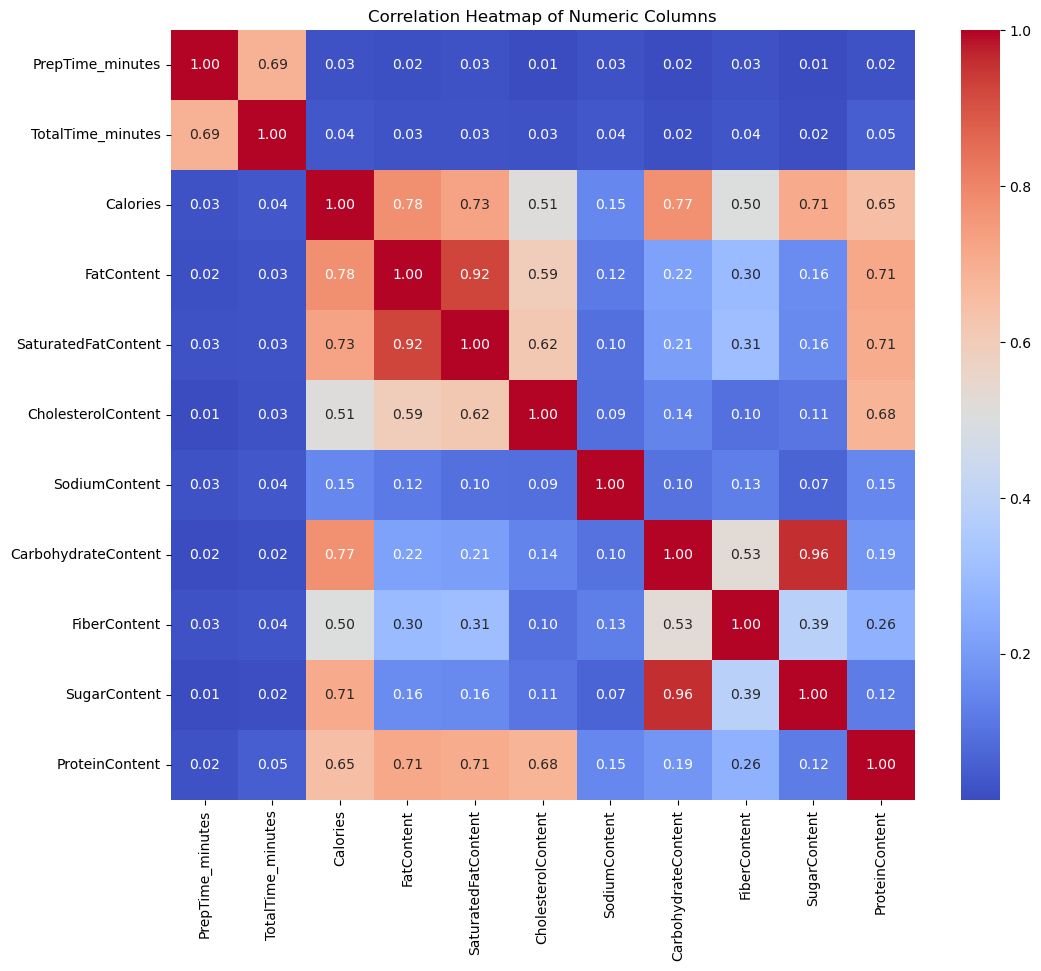

In [52]:
corr_matrix = recipes_clean[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

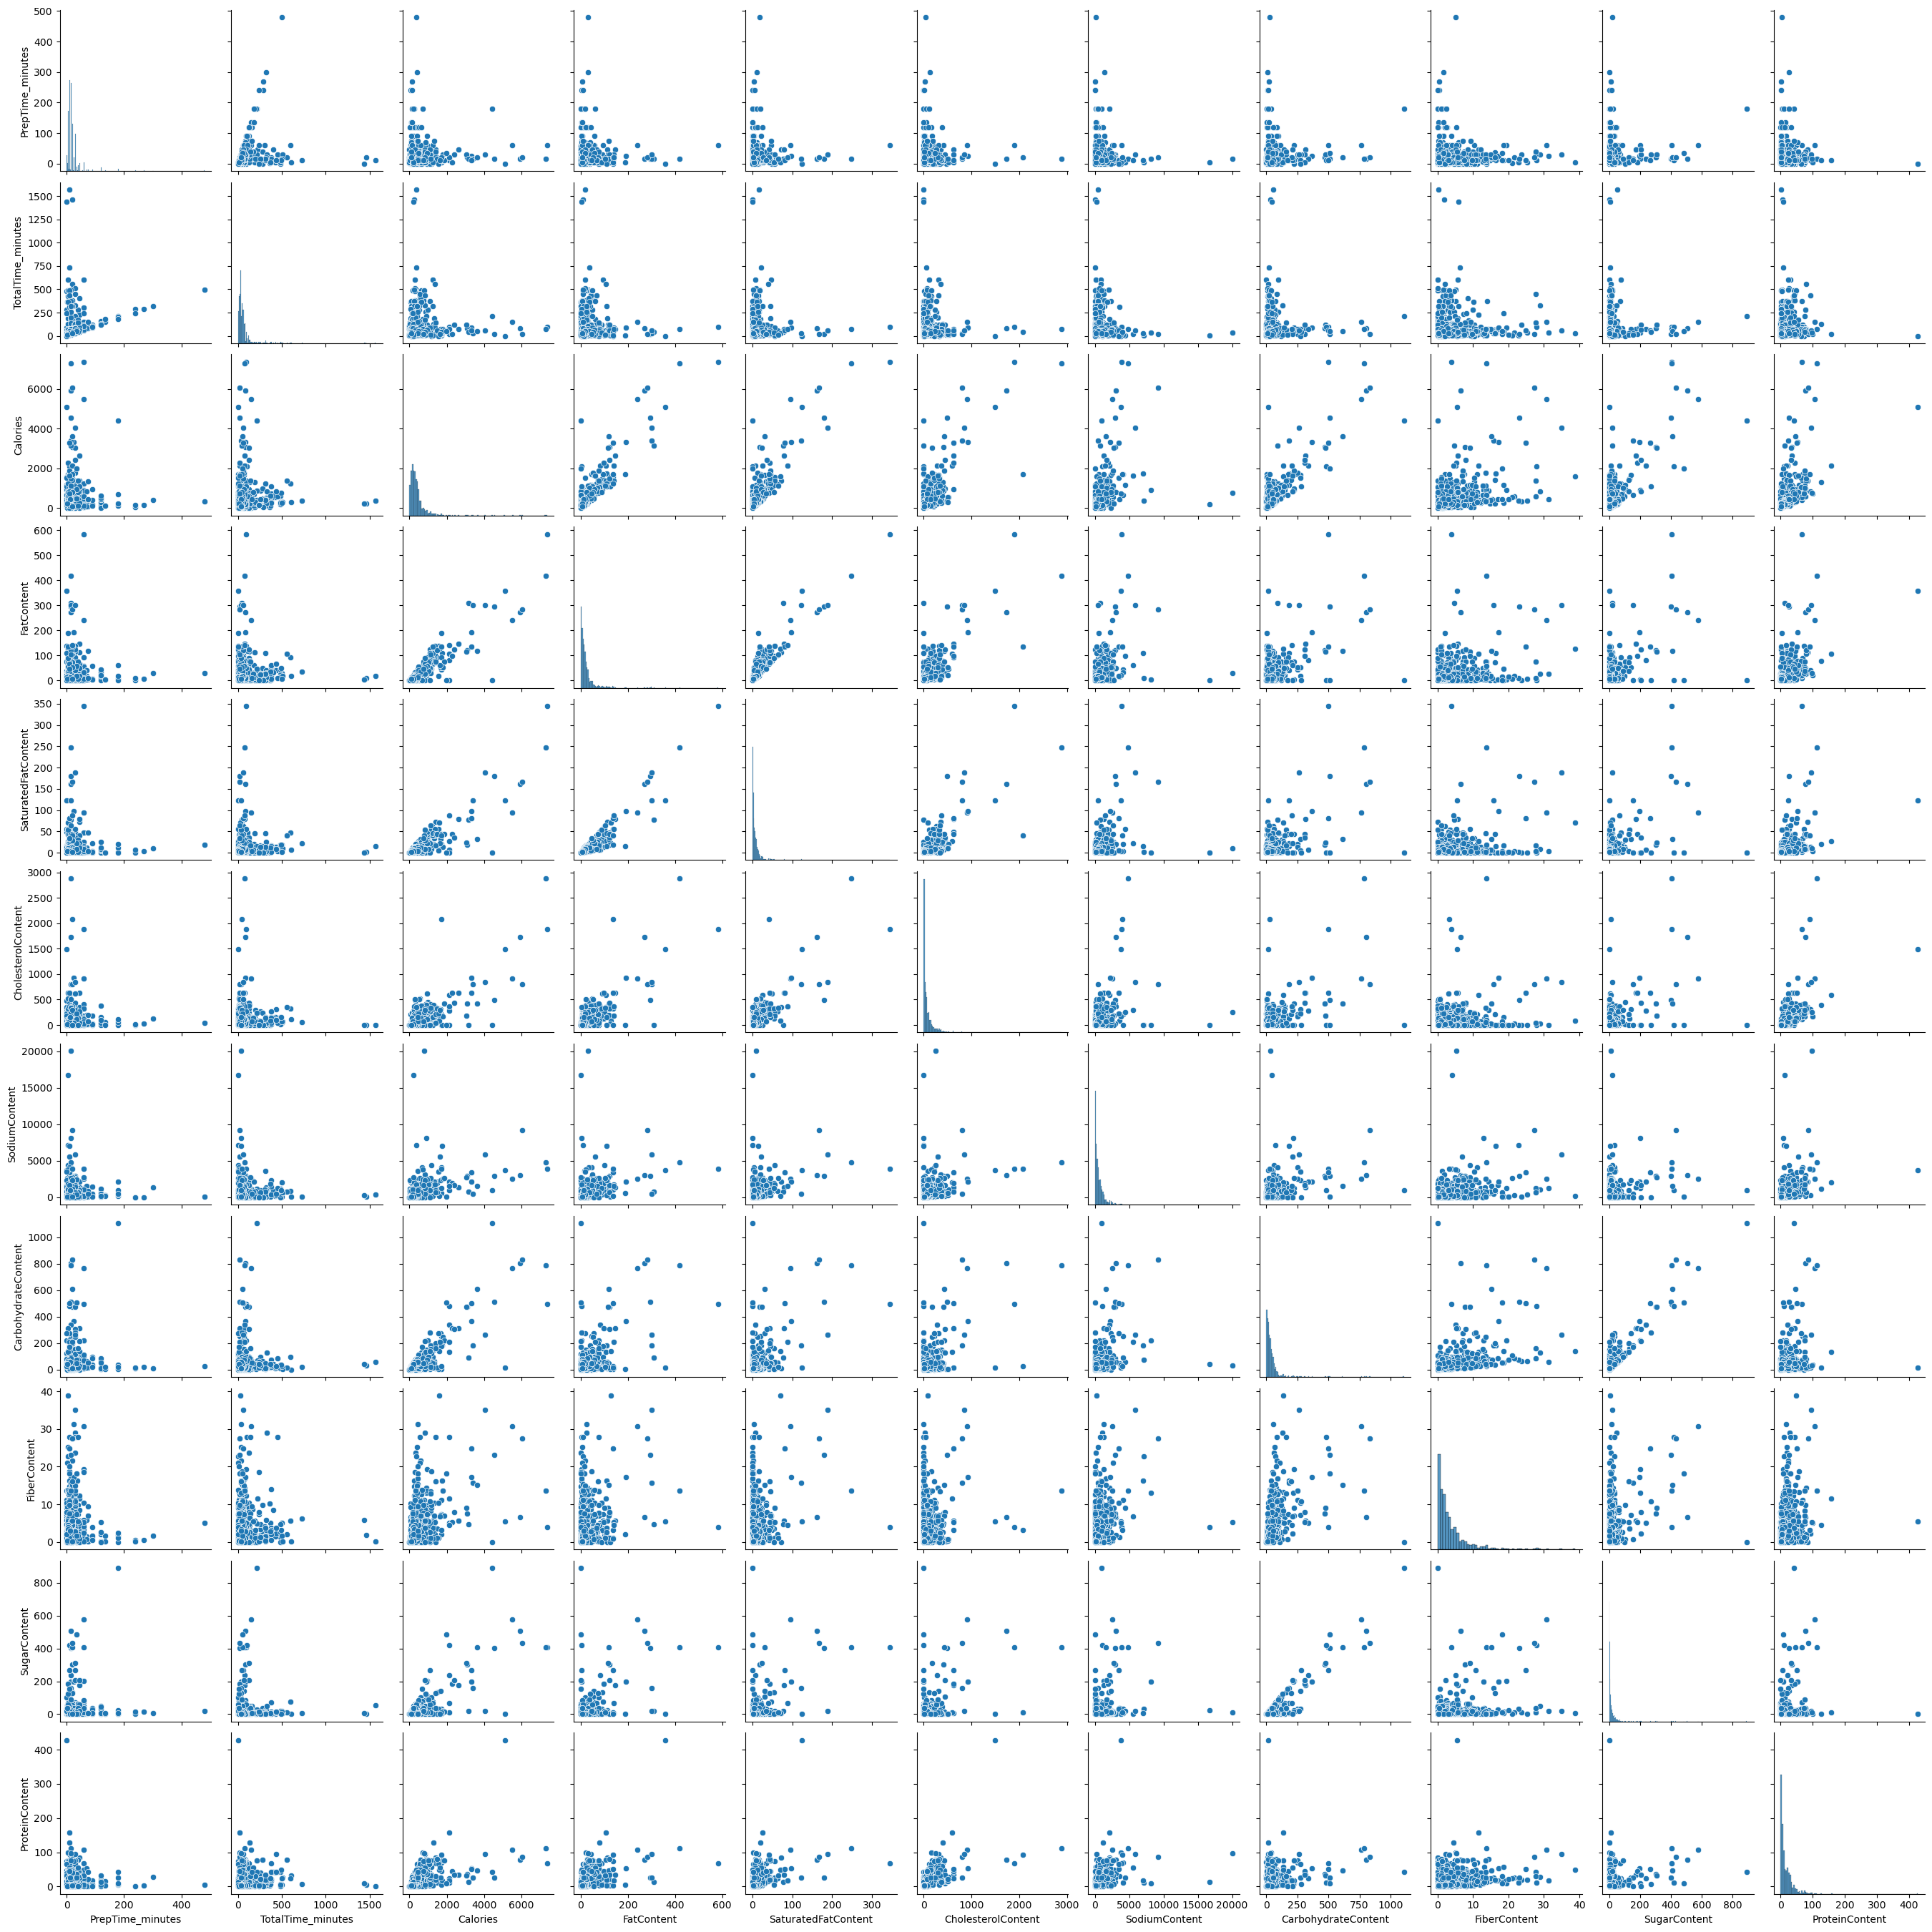

In [54]:
sns.pairplot(recipes_clean[numeric_cols].sample(1000))
plt.show()

In [55]:
recipes_clean.Calories.sort_values().reset_index()

,index,Calories
0,392160,0.0
1,208495,0.0
2,487157,0.0
3,412789,0.0
4,492423,0.0
...,...,...
520901,412861,70396.6
520902,53650,90904.2
520903,218186,101614.7
520904,501590,350473.1


In [57]:
recipes_clean[recipes_clean['Calories'] == 434360.2]['RecipeInstructions'].iloc[0]


'c("To boiled cornmeal add yeast and lots of sugar.", "Let the mash ferment.", "once fermented cook the mash.")'

### Lets look at the outliers

In [58]:
print(recipes_clean[recipes_clean['Calories']>5000].shape[0])
print(recipes_clean[recipes_clean['Calories']<1000].shape[0])

2575
481427


In [61]:
# How many of data point fall after 99.5 percentile of the datapoint for each feature
outliers = set()
for cols in numeric_cols:
    indices = recipes_clean[recipes_clean[cols] > recipes_clean[cols].quantile(0.995)].index
    print(f" Number of {cols} outliers: ", recipes_clean[recipes_clean[cols] > recipes_clean[cols].quantile(0.995)].shape[0])
    outliers.update(indices)

print("===================================")
print("In total we have this many outliers:", len(outliers))

 Number of PrepTime_minutes outliers:  2579
 Number of TotalTime_minutes outliers:  2338
 Number of Calories outliers:  2605
 Number of FatContent outliers:  2604
 Number of SaturatedFatContent outliers:  2602
 Number of CholesterolContent outliers:  2605
 Number of SodiumContent outliers:  2605
 Number of CarbohydrateContent outliers:  2604
 Number of FiberContent outliers:  2602
 Number of SugarContent outliers:  2604
 Number of ProteinContent outliers:  2603
In total we have this many outliers: 13973


In [62]:
# Dropping all the outliers
recipes_clean = recipes_clean.drop(index=outliers)
recipes_clean.shape

(506933, 19)

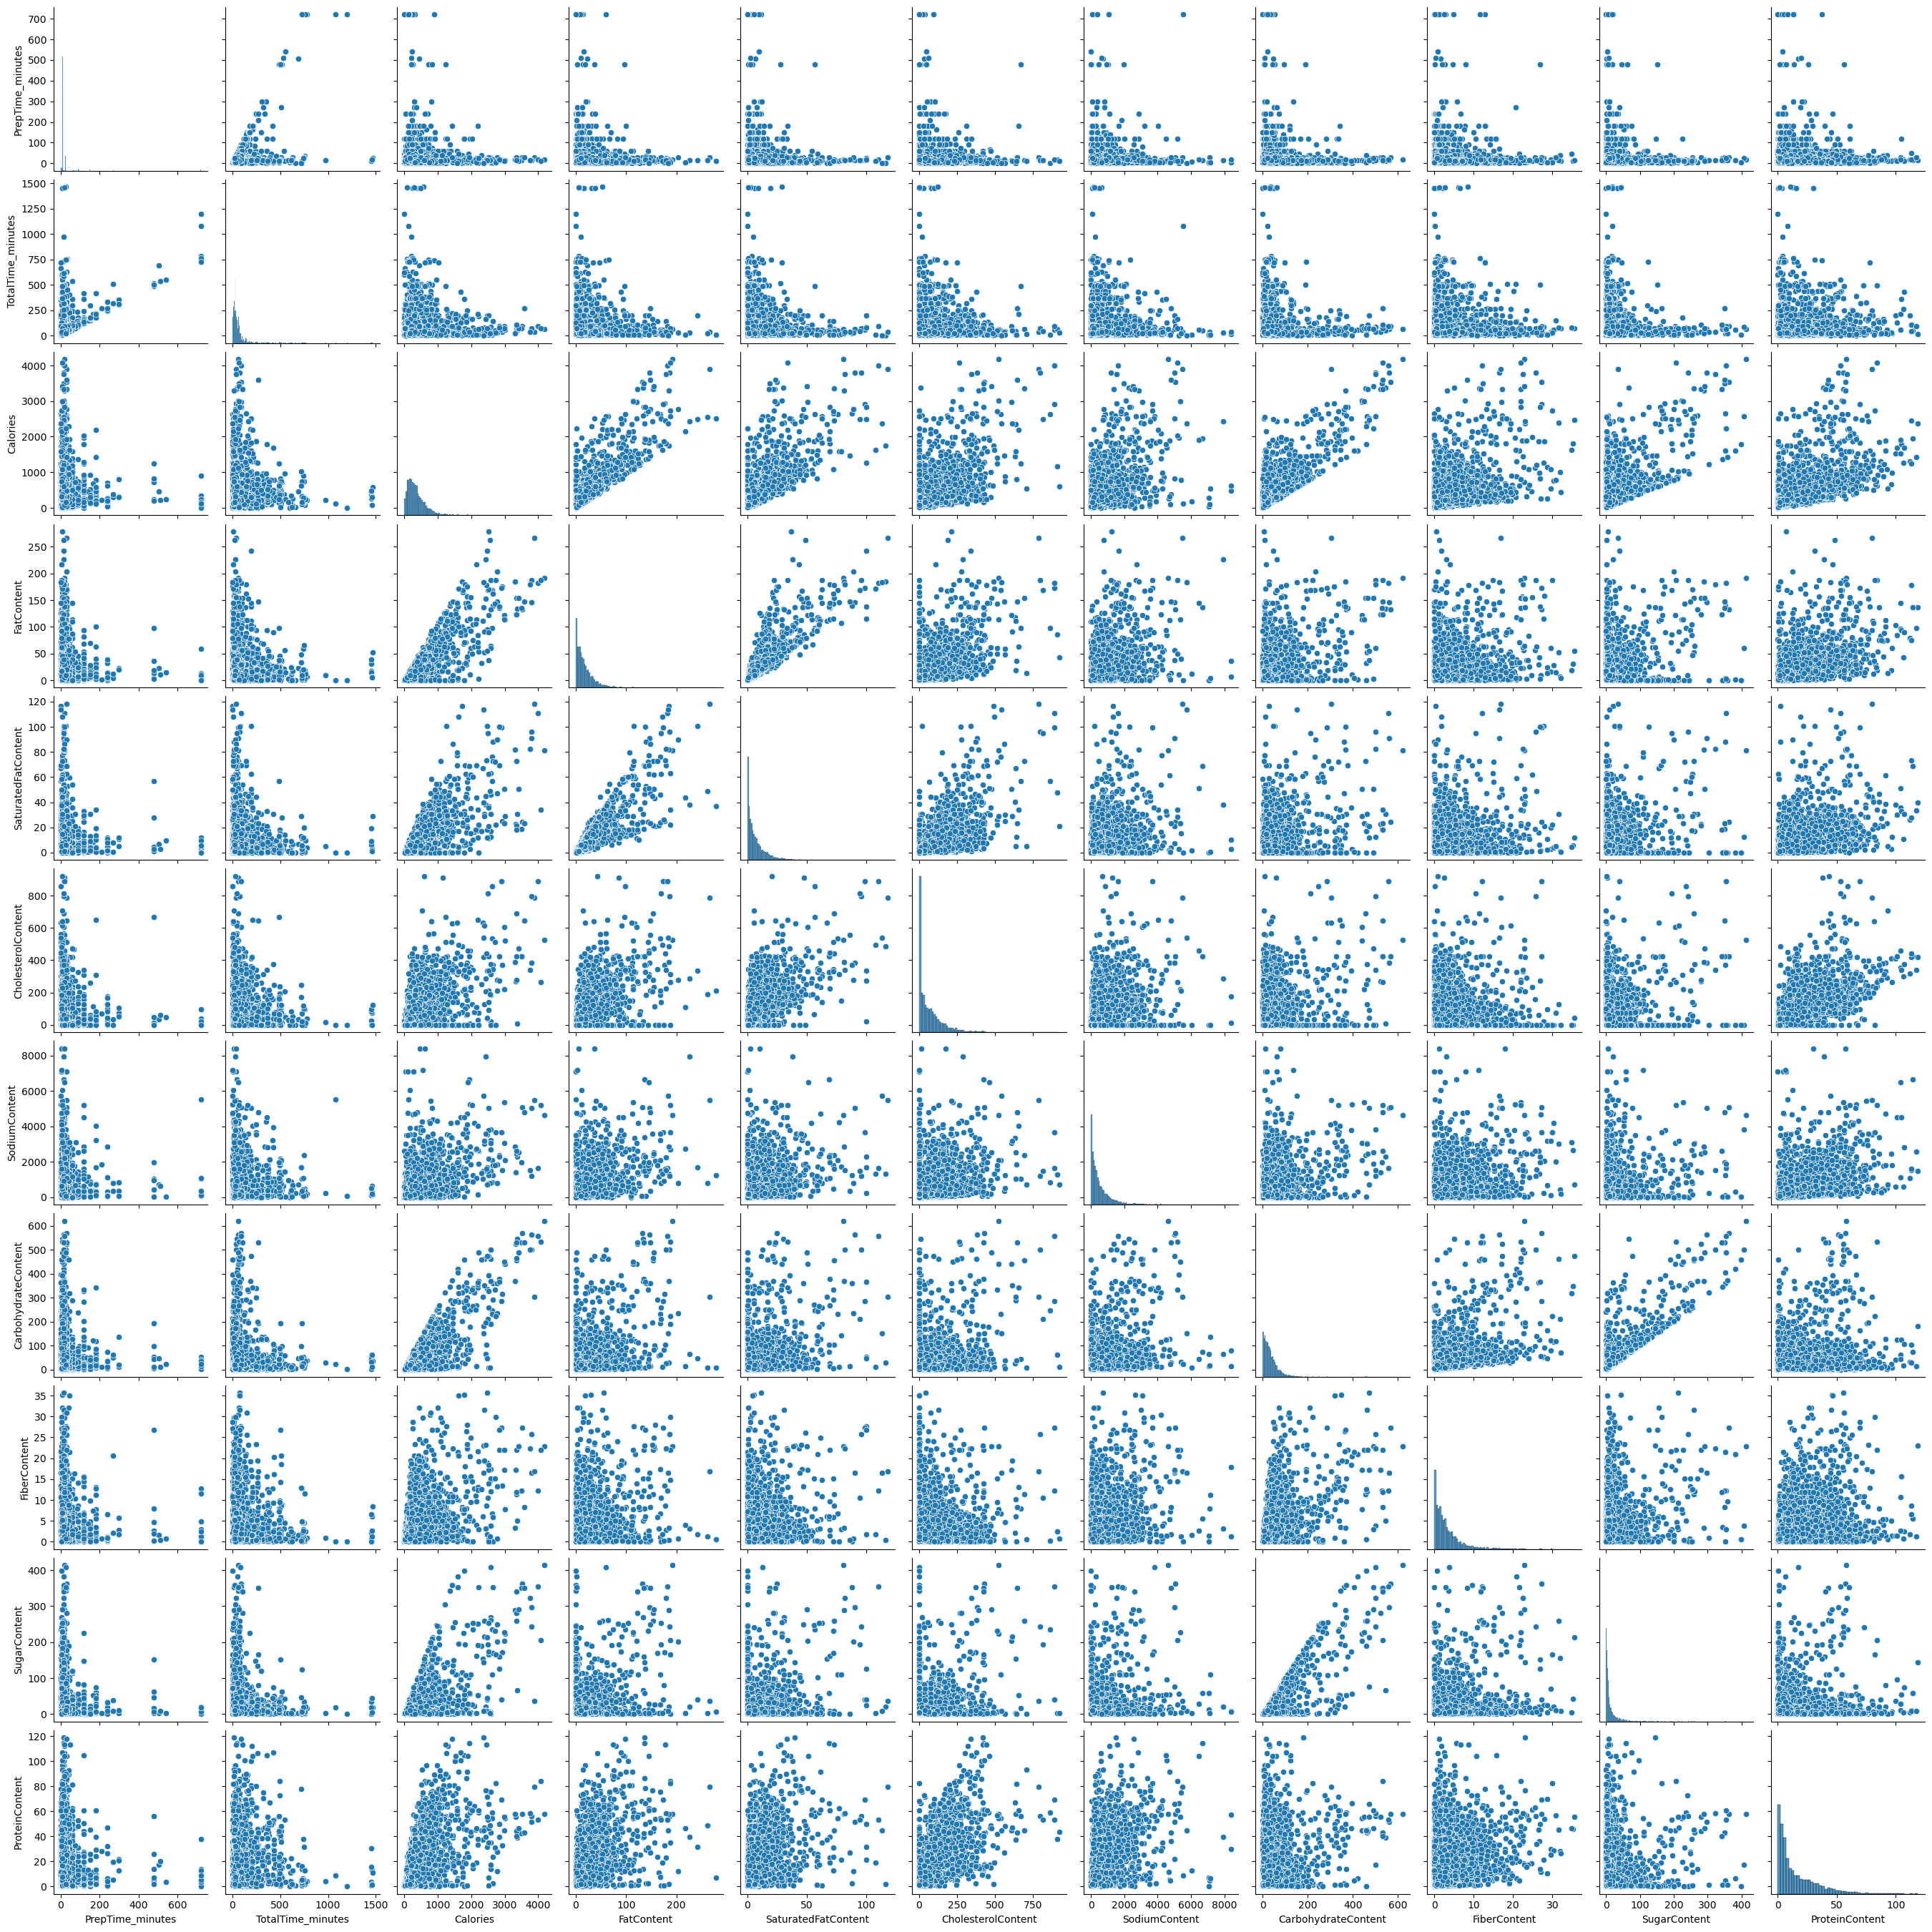

In [63]:
sns.pairplot(recipes_clean[numeric_cols].sample(5000))
plt.show()

In [64]:
recipes_clean.shape

(506933, 19)

In [65]:
recipes_clean.isna().sum()

RecipeId                 0
Name                     0
AuthorId                 0
AuthorName               0
DatePublished            0
RecipeCategory           0
RecipeIngredientParts    0
Calories                 0
FatContent               0
SaturatedFatContent      0
CholesterolContent       0
SodiumContent            0
CarbohydrateContent      0
FiberContent             0
SugarContent             0
ProteinContent           0
RecipeInstructions       0
PrepTime_minutes         0
TotalTime_minutes        0
dtype: int64

In [66]:
recipes_clean.to_csv("cleaned_recipes.csv")

### Now Lets look at the reviews

In [28]:
reviews.groupby('AuthorId')['Review'].count().sort_values(ascending=False).head(50)

AuthorId
424680     8842
37449      6605
383346     5438
128473     4693
169430     4586
89831      3963
58104      3743
199848     3688
133174     3590
305531     3543
226863     3340
4470       3260
369715     3167
498271     3014
1072593    2810
176615     2790
95743      2664
286566     2635
107583     2588
88099      2574
140132     2563
80353      2529
166642     2518
39835      2515
131126     2426
107135     2415
222564     2317
126440     2310
157425     2279
280271     2227
461834     2182
5060       2098
593927     2054
482376     2029
174096     1990
6357       1970
486725     1962
204024     1941
679953     1934
17803      1921
104295     1920
428885     1862
542159     1853
8688       1806
53932      1784
47892      1767
163112     1733
400708     1730
1179225    1730
173579     1728
Name: Review, dtype: int64

In [29]:
reviews[reviews['AuthorId'] == 424680]

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
335911,358739,117775,424680,Sydney Mike,4,I've made this recipe several times during the...,2007-01-13T13:24:37Z,2007-01-13T13:24:37Z
340126,363304,97439,424680,Sydney Mike,4,"Couldn't resist a recipe like this one, & sinc...",2007-01-23T13:34:33Z,2007-01-23T13:34:33Z
340129,363307,200754,424680,Sydney Mike,5,I made this recipe for myself & a friend--if I...,2007-01-23T15:57:57Z,2007-01-23T15:57:57Z
340959,364188,205884,424680,Sydney Mike,4,Got to admit that I decided to make this recip...,2007-01-25T16:51:30Z,2007-01-25T16:51:30Z
341006,364236,22782,424680,Sydney Mike,5,"As with most recipes I make, I followed the di...",2007-01-25T14:25:11Z,2007-01-25T14:25:11Z
...,...,...,...,...,...,...,...,...
1238878,1422657,484729,424680,Sydney Mike,5,"Using frozen peaches, I pretty much followed t...",2013-12-27T20:35:28Z,2013-12-27T20:35:28Z
1238879,1422658,310402,424680,Sydney Mike,5,"Made this recipe pretty much as given, though ...",2013-12-27T20:40:44Z,2013-12-27T20:40:44Z
1239677,1423537,99081,424680,Sydney Mike,5,"THIS IS A GREAT SPREAD, & the recipe is now sa...",2008-11-22T13:29:07Z,2008-11-22T13:29:07Z
1239890,1423778,148178,424680,Sydney Mike,5,Thanks for posting this great fudge recipe ~ V...,2009-06-09T10:29:08Z,2009-06-09T10:29:08Z


In [30]:
print(reviews.shape)
reviews.isna().sum()

(1401982, 8)


ReviewId           0
RecipeId           0
AuthorId           0
AuthorName         0
Rating             0
Review           214
DateSubmitted      0
DateModified       0
dtype: int64

In [31]:
less_rows_reviews = reviews.dropna(subset=['Review'])
print(less_rows_reviews.shape)

(1401768, 8)


In [32]:
# less_rows_reviews.to_csv("cleaned_reviews.csv")

# Now lets prepare the data for VAE

We have both numeric and text features that we would like to use both. In order to be able to use both at the same time, we need to have two arms for the text data and for the numeric data. The numeric data should be scaled and the text data must be vectorized. For the text we can use one of the pretrained llm models to generate embeding for them and that embedign will go the the model as input.

In [1]:
import kagglehub
import pandas as pd

# Optionally, set your Kaggle config dir if needed
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/home/fahimeh/miniconda3/envs/recipe/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("input_data/cleaned_recipes.csv")

In [3]:
print(df.isna().sum())
print(df.shape)

Unnamed: 0               0
RecipeId                 0
Name                     0
AuthorId                 0
AuthorName               0
DatePublished            0
RecipeCategory           0
RecipeIngredientParts    0
Calories                 0
FatContent               0
SaturatedFatContent      0
CholesterolContent       0
SodiumContent            0
CarbohydrateContent      0
FiberContent             0
SugarContent             0
ProteinContent           0
RecipeInstructions       0
PrepTime_minutes         0
TotalTime_minutes        0
dtype: int64
(506933, 20)


In [4]:
text_cols = ['Name', 'RecipeCategory', 'RecipeIngredientParts', 'RecipeInstructions']
df[text_cols].head()

,Name,RecipeCategory,RecipeIngredientParts,RecipeInstructions
0,Biryani,Chicken Breast,"c(""saffron"", ""milk"", ""hot green chili peppers""...","c(""Soak saffron in warm milk for 5 minutes and..."
1,Best Lemonade,Beverages,"c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...","c(""Into a 1 quart Jar with tight fitting lid, ..."
2,Cabbage Soup,Vegetable,"c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...","c(""Mix everything together and bring to a boil..."
3,Best Blackbottom Pie,Pie,"c(""graham cracker crumbs"", ""sugar"", ""butter"", ...","c(""Graham Cracker Crust: In small bowl, combin..."
4,Warm Chicken A La King,Chicken,"c(""chicken"", ""butter"", ""flour"", ""milk"", ""celer...","c(""Melt 1 1/2 ozs butter, add the flour and co..."


In [5]:
numeric_cols = ['PrepTime_minutes', 'TotalTime_minutes', 'Calories', 'FatContent', 'SaturatedFatContent', 
                'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent',
                'SugarContent', 'ProteinContent']  

print(df.isna().sum())
df[numeric_cols].head()

Unnamed: 0               0
RecipeId                 0
Name                     0
AuthorId                 0
AuthorName               0
DatePublished            0
RecipeCategory           0
RecipeIngredientParts    0
Calories                 0
FatContent               0
SaturatedFatContent      0
CholesterolContent       0
SodiumContent            0
CarbohydrateContent      0
FiberContent             0
SugarContent             0
ProteinContent           0
RecipeInstructions       0
PrepTime_minutes         0
TotalTime_minutes        0
dtype: int64


,PrepTime_minutes,TotalTime_minutes,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
0,240.0,265.0,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4
1,30.0,35.0,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3
2,20.0,50.0,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3
3,20.0,140.0,437.9,19.3,10.9,94.3,267.6,58.0,1.8,42.5,7.0
4,35.0,38.0,895.5,66.8,31.9,405.8,557.2,29.1,3.1,5.0,45.3


In [6]:
df.shape

(506933, 20)

# Lets use an embedding model to embed our text data

In [8]:
import torch
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import StandardScaler
from tqdm.auto import tqdm

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# 1.1 Create a single text string per recipe (consistent template)
def row_to_text(row):
    return (
        f"title: {row.get('Name','')} | "
        f"ingredients: {row.get('RecipeIngredientParts','')} | "
        f"category: {row.get('RecipeCategory','')} | "
        f"description: {row.get('RecipeInstructions','')}"
    )
texts = df.apply(row_to_text, axis=1).astype(str).tolist()

# 1.2 Embed (precompute & save)
# MODEL_NAME = 'all-MiniLM-L6-v2'
MODEL_NAME = 'all-mpnet-base-v2'
embed_model = SentenceTransformer(MODEL_NAME, device=device)  # fast & compact

BATCH = 256  # smaller batch to avoid GPU overload
embeds_path = f'input_data/{MODEL_NAME}_text_embeds.npy'

if os.path.exists(embeds_path):
    text_embeds = np.load(embeds_path)
else:
    text_embeds = embed_model.encode(
        texts,
        batch_size=BATCH,
        show_progress_bar=True,
        convert_to_numpy=True,
        device=device
    )
    np.save(embeds_path, text_embeds)

# 1.3 Numeric features: select and scale (save scaler)
X_num = df[numeric_cols].astype(float)
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)
# Save scaler with joblib if desired

Using device: cuda


Batches: 100%|██████████| 1981/1981 [1:15:35<00:00,  2.29s/it]


In [9]:
print(text_embeds.shape)
print(X_num_scaled.shape)

(506933, 768)
(506933, 11)


In [10]:
len(texts)

506933

Lets save the data and then go to the next python file to write the VAE code

In [11]:
df_array = df.to_records(index=False)
np.savez(f'input_data/{MODEL_NAME}_vae_input_data.npz', text_embeds=text_embeds, numeric_scaled=X_num_scaled, recipes=df_array)
print(f"Data saved to input_data/{MODEL_NAME}_vae_input_data.npz")

Data saved to input_data/all-mpnet-base-v2_vae_input_data.npz
